## ASSIGNMENT 3

**Shamir Cardenas/vea930**

## Exercise 13

## **13(a)**

Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

In [86]:
#libraries used

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
import ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [18]:
Weekly=load_data("Weekly")


In [20]:
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [22]:
Weekly.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75%       1.405000     2.053727     1.405000  
max      12.026000     9.328214    12.026000

In [24]:
Weekly.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [26]:
Weekly.corr(numeric_only=True)

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000

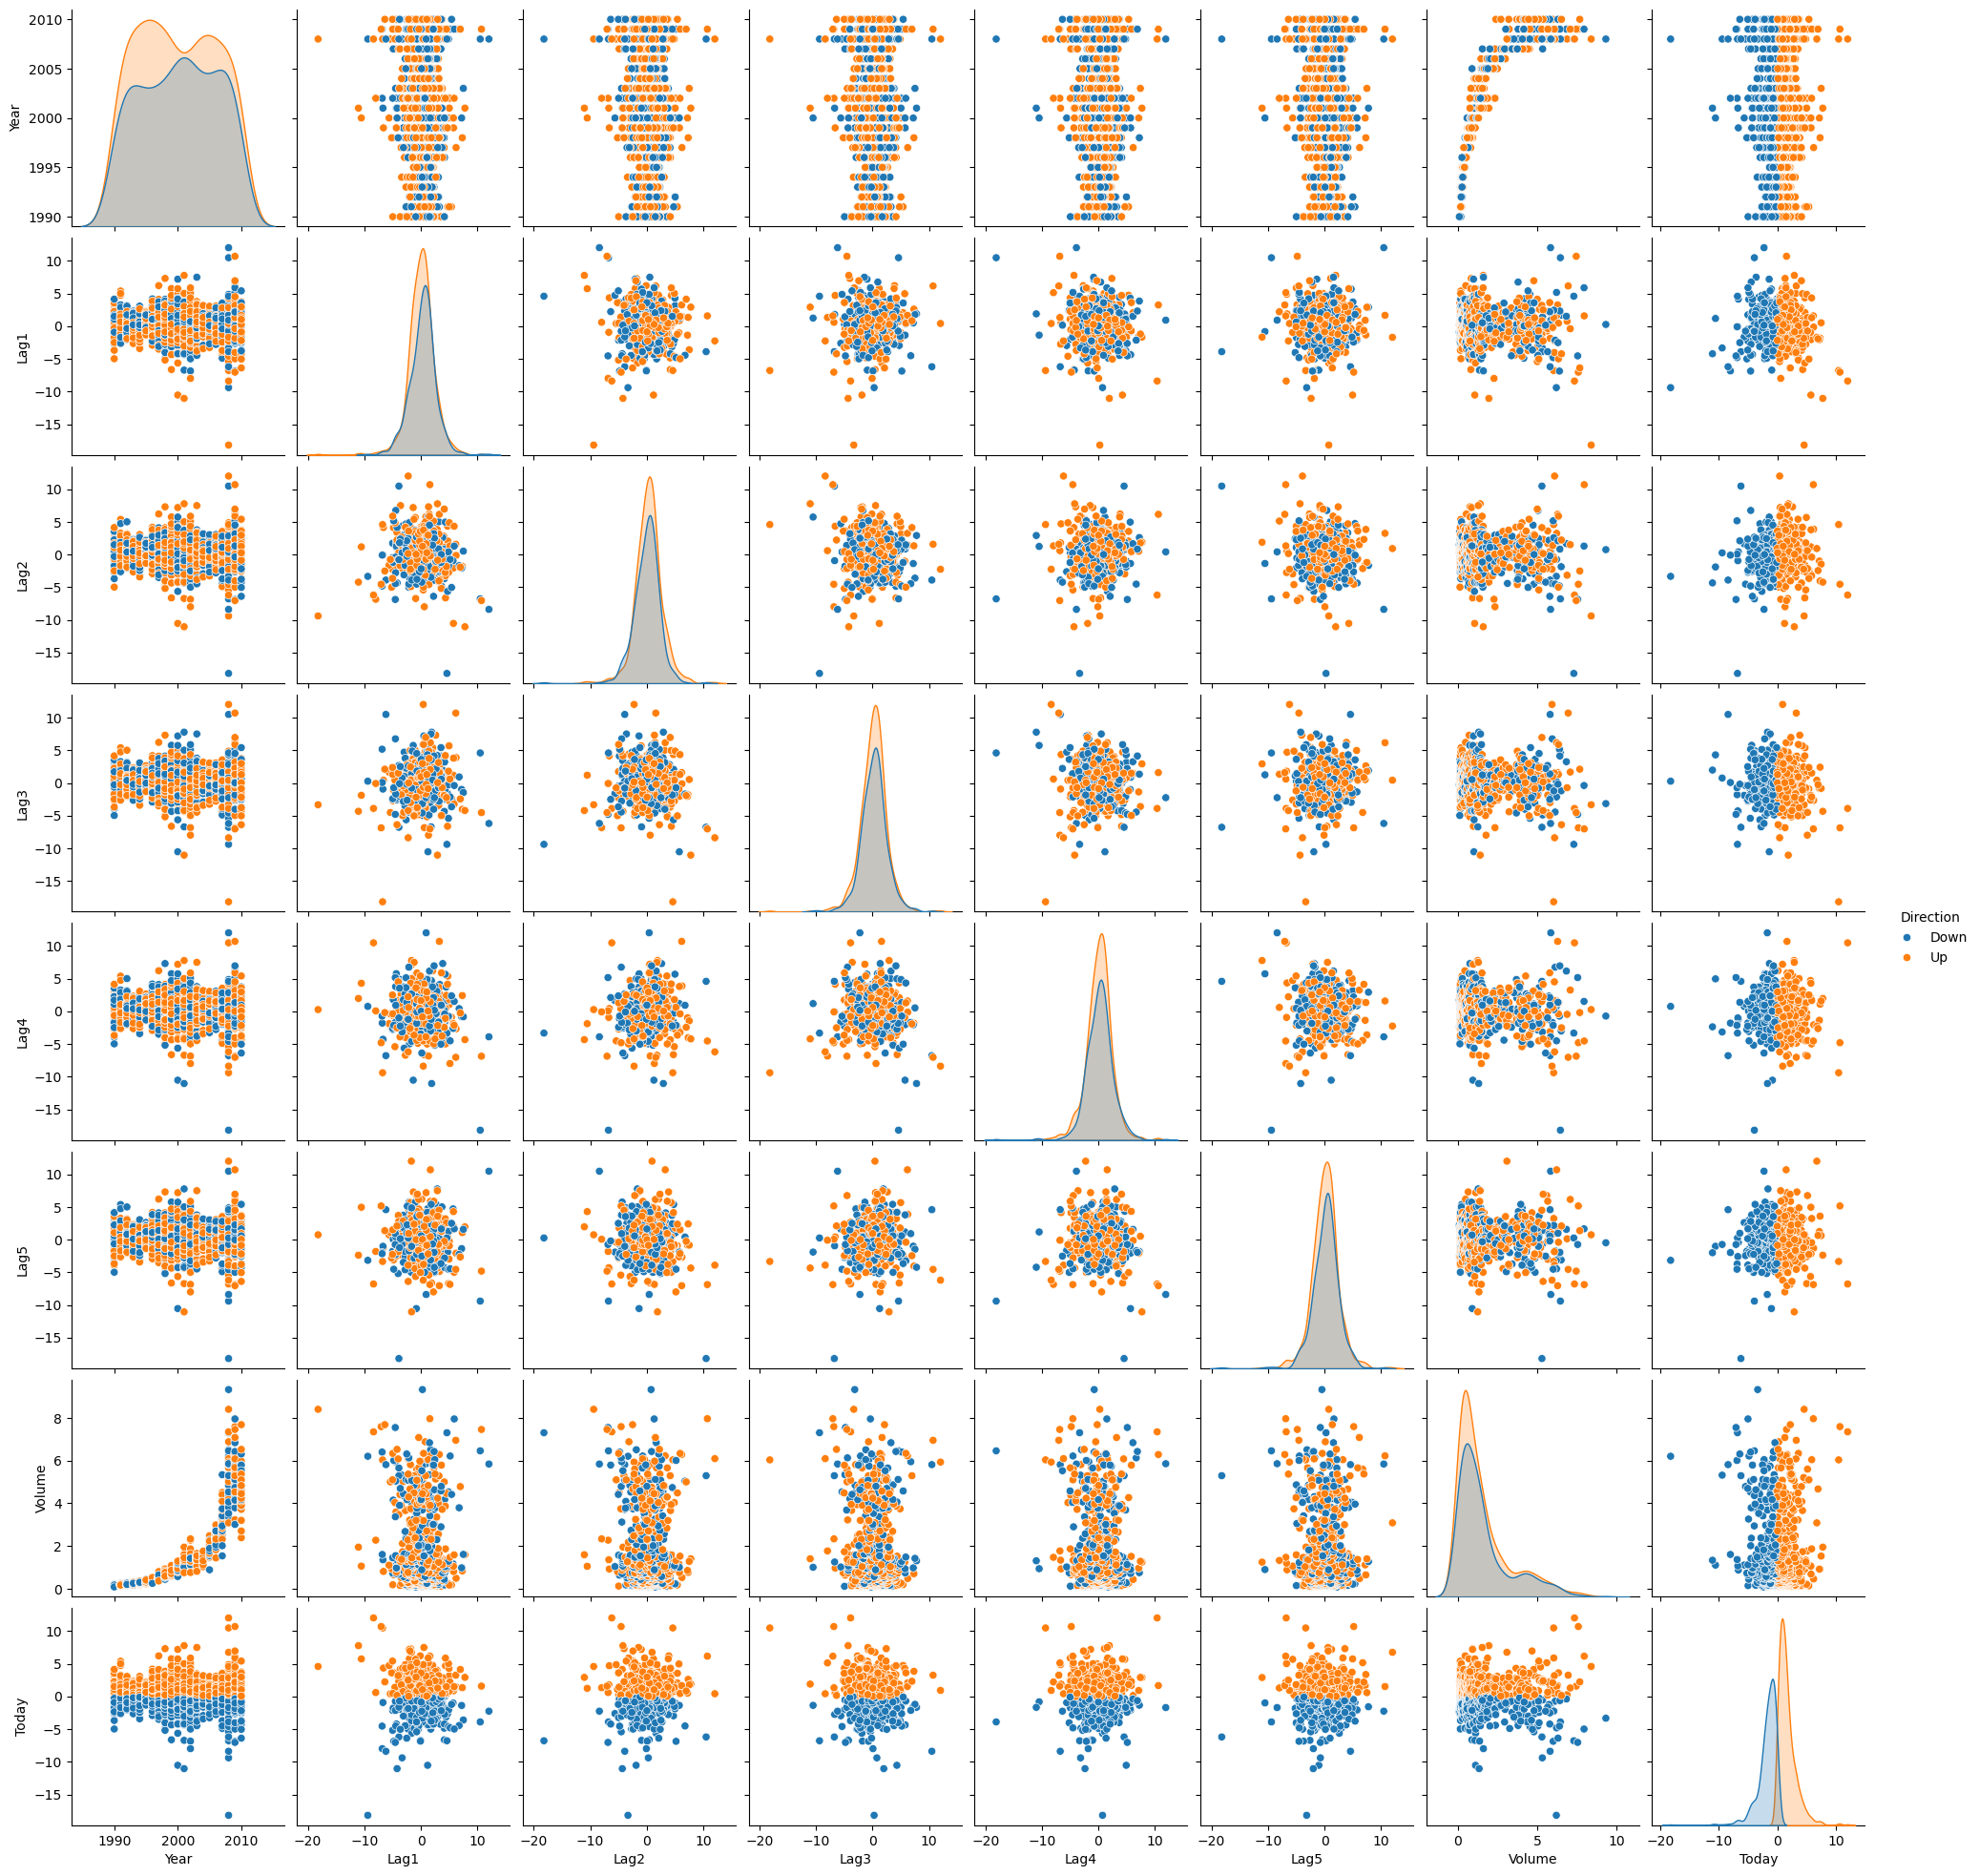

In [28]:
sns.pairplot(Weekly, hue = 'Direction')

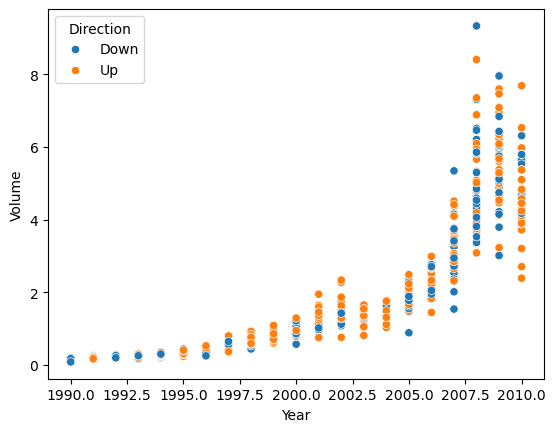

In [30]:
sns.scatterplot(data = Weekly, x = 'Year', y = 'Volume', hue = 'Direction')
plt.title = ("Volume Vs. Year by Colored Direction")

**My Answer:**

I would say that the only pattern that was visible within the data so far is a relationship between **Volume** and **Year**. 

## 13(b)

Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [34]:
X = Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = Weekly['Direction'].map({'Up': 1, 'Down': 0})  

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 05 Jul 2025   Pseudo R-squ.:                0.006580
Time:                        16:17:11   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

**My Answer:**

The only predictor that is statistically significatn with a p-value less than .05 is Lag2, the percentage return for 2 weeks previous. 

## **13(c)**

Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

In [60]:
y_pred_prob = logit_model.predict(X)

y_pred_class = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y, y_pred_class)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Down', 'Actual Up'], 
                     columns=['Predicted Down', 'Predicted Up'])

print("Confusion Matrix:")
print(cm_df)


accuracy = accuracy_score(y, y_pred_class)
print("Accuracy:", accuracy)

Confusion Matrix:
             Predicted Down  Predicted Up
Actual Down              54           430
Actual Up                48           557
Accuracy: 0.5610651974288338


In [70]:
Dwn_accur = (54/(54+430))
Up_accur = (557/(48+557))

print("Recall for Down:", Dwn_accur)
print("Recall for Up:", Up_accur)


Recall for Down: 0.1115702479338843
Recall for Up: 0.9206611570247933


**My Answer:**

While the overal accuracy of the model is 56.1%, slighlty better than guessing, the sensitivity of each individual classifier is 11.2% for Down and 92.1% for Up. This means that out of all the Down days for the stock market in our data, the current model only correctly labeled 11.1% of those.  

## 13(d)

Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010)

In [80]:

train_data = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]
test_data = Weekly[(Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)]

X_train = train_data[['Lag2']] 
y_train = train_data['Direction']  


X_test = test_data[['Lag2']]
y_test = test_data['Direction']


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)


y_pred_prob = logit_model.predict_proba(X_test)[:, 1]  
y_pred_class = logit_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred_class)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Down', 'Actual Up'], 
                     columns=['Predicted Down', 'Predicted Up'])

print("Confusion Matrix (Test Data 2009-2010):")
print(cm_df)


accuracy = accuracy_score(y_test, y_pred_class)
print(f"\nOverall fraction of correct predictions: {accuracy:.4f}")
print(f"Accuracy percentage: {accuracy * 100:.2f}%")


y_train_pred = logit_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy (1990-2008): {train_accuracy:.4f}")
print(f"Test accuracy (2009-2010): {accuracy:.4f}")

Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down               9            34
Actual Up                 5            56

Overall fraction of correct predictions: 0.6250
Accuracy percentage: 62.50%

Training accuracy (1990-2008): 0.5553
Test accuracy (2009-2010): 0.6250


## **13 (e-h)**

(e) Repeat (d) using LDA.

(f) Repeat (d) using QDA.

(g) Repeat (d) using KNN with K = 1.

(h) Repeat (d) using naive Bayes.

In [98]:
# (e) Linear Discriminant Analysis (LDA)
print("(e) Linear Discriminant Analysis (LDA)")
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)
print_results("LDA", y_test, y_pred_lda)

(e) Linear Discriminant Analysis (LDA)

LDA Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down               9            34
Actual Up                 5            56

Overall fraction of correct predictions: 0.6250
Accuracy percentage: 62.50%


In [100]:
# (f) Quadratic Discriminant Analysis (QDA)
print("\n(f) Quadratic Discriminant Analysis (QDA)")
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred_qda = qda_model.predict(X_test)
print_results("QDA", y_test, y_pred_qda)


(f) Quadratic Discriminant Analysis (QDA)

QDA Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down               0            43
Actual Up                 0            61

Overall fraction of correct predictions: 0.5865
Accuracy percentage: 58.65%


In [94]:
# (g) K-Nearest Neighbors with K=1
print("\n(g) K-Nearest Neighbors (K=1)")
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print_results("KNN (K=1)", y_test, y_pred_knn)


(g) K-Nearest Neighbors (K=1)

KNN (K=1) Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down              21            22
Actual Up                30            31

Overall fraction of correct predictions: 0.5000
Accuracy percentage: 50.00%


In [102]:
# (h) Naive Bayes
print("\n(h) Naive Bayes")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print_results("Naive Bayes", y_test, y_pred_nb)


(h) Naive Bayes

Naive Bayes Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down               0            43
Actual Up                 0            61

Overall fraction of correct predictions: 0.5865
Accuracy percentage: 58.65%


## **13(i)**

Which of these methods appears to provide the best results on
this data?

**My Answer:**

Based on the accuracy percentage, LDA with 62.5% accuracy is probably the best fitted model. 

## **14**

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

## **14(a)**

 Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
method of the data frame. Note you may find it helpful to add
a column mpg01 to the data frame by assignment. Assuming you
have stored the data frame as Auto, this can be done as follows:
Auto['mpg01 '] = mpg01

In [114]:
auto = load_data('Auto')

In [116]:
auto.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1

In [118]:
auto.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [120]:
auto.median()

mpg               22.75
cylinders          4.00
displacement     151.00
horsepower        93.50
weight          2803.50
acceleration      15.50
year              76.00
origin             1.00
dtype: float64

In [128]:
mpg_median = auto['mpg'].median()
mpg01 = np.where(Auto['mpg'] > mpg_median, 1, 0)

print(f"\nBinary variable mpg01 created:")
print(f"Shape: {mpg01.shape}")
print(f"Data type: {mpg01.dtype}")
print(f"Value counts:\n{pd.Series(mpg01).value_counts().sort_index()}")


Binary variable mpg01 created:
Shape: (392,)
Data type: int64
Value counts:
0    196
1    196
Name: count, dtype: int64


In [142]:
auto['mpg01'] = mpg01

In [132]:
auto.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  mpg01  
name                                                          
chevrolet chevelle malibu          12.0    70       1      0  
buick skylark 320                  11.5    70       1      0  
plymouth satellite                 11.0    70       1      0  
amc rebel sst                      12.0    70       1      0  
ford torino                        10.5    70       1      0

## **14(b)**

Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

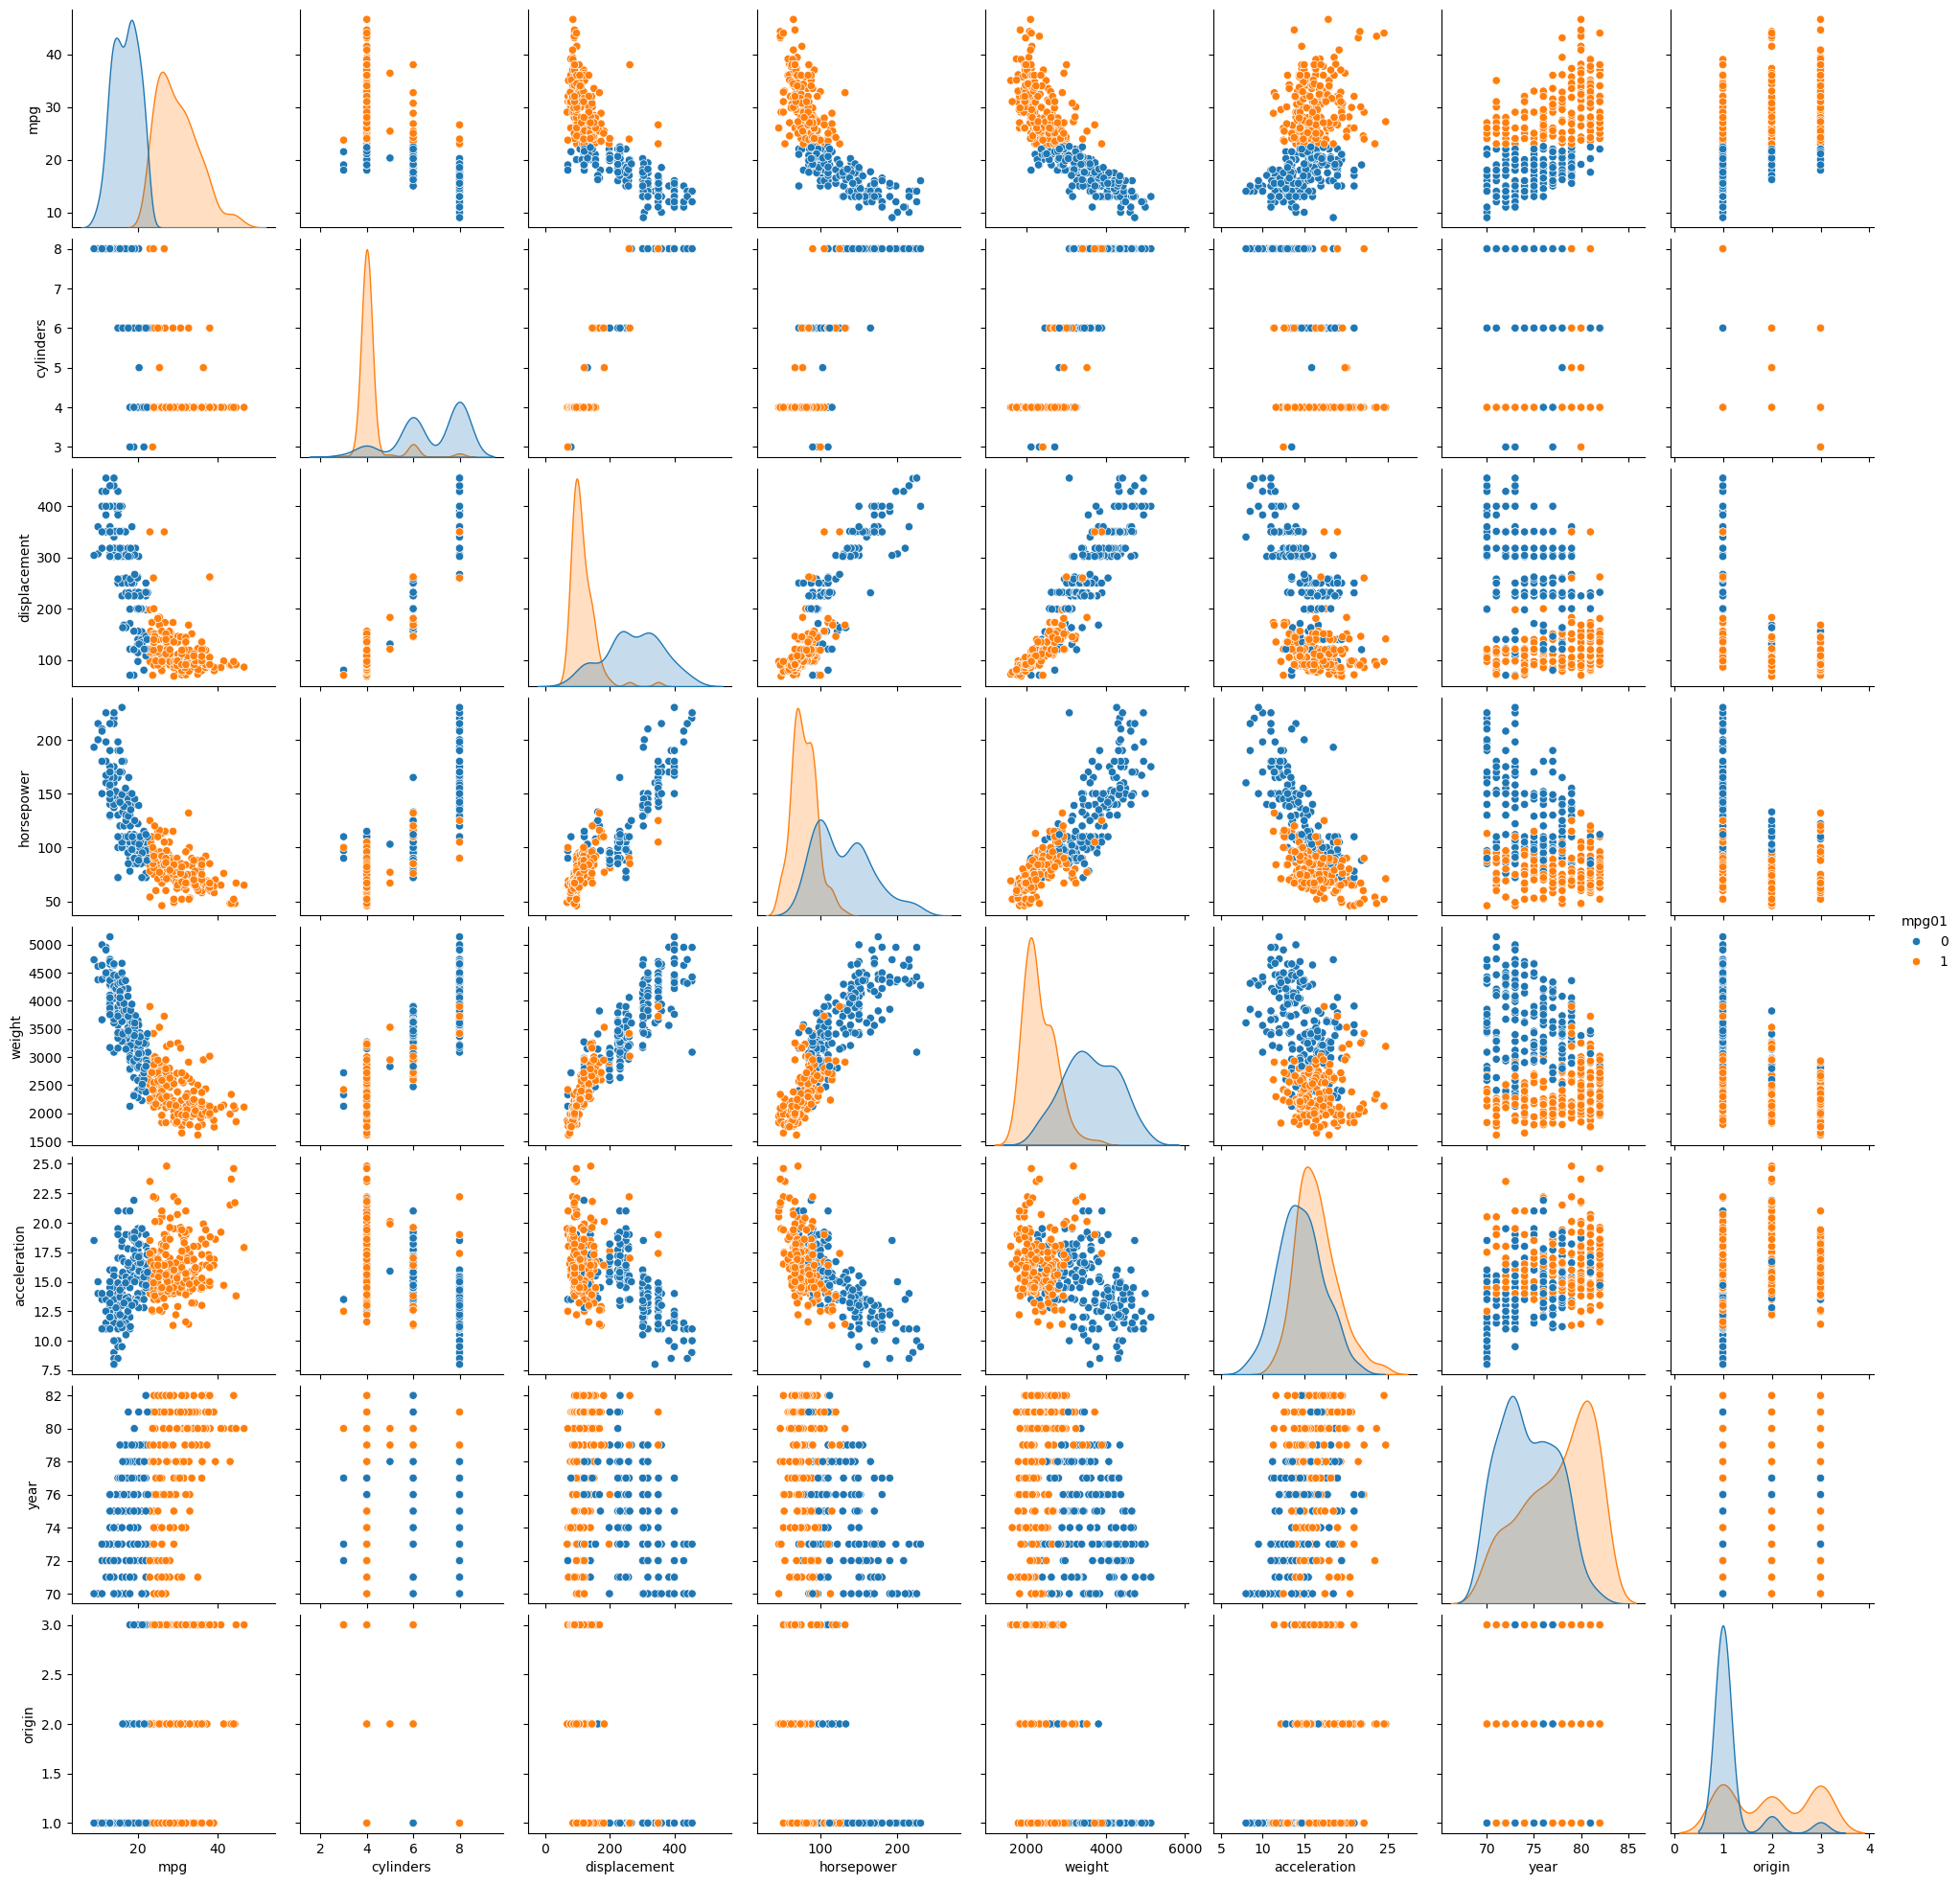

In [140]:
sns.pairplot(auto, hue = 'mpg01')

<Axes: xlabel='mpg01', ylabel='acceleration'>

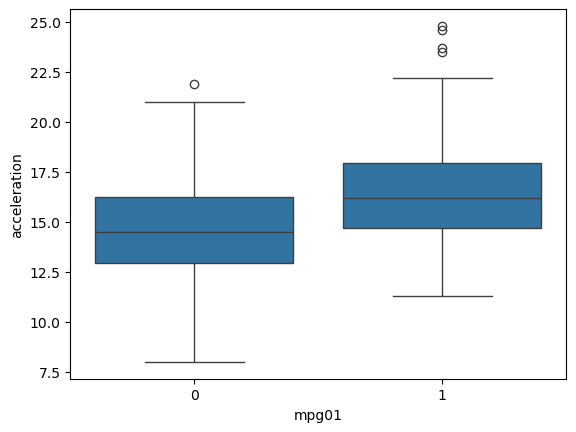

In [157]:
sns.boxplot(data=auto, x='mpg01', y='acceleration')

<Axes: xlabel='mpg01', ylabel='weight'>

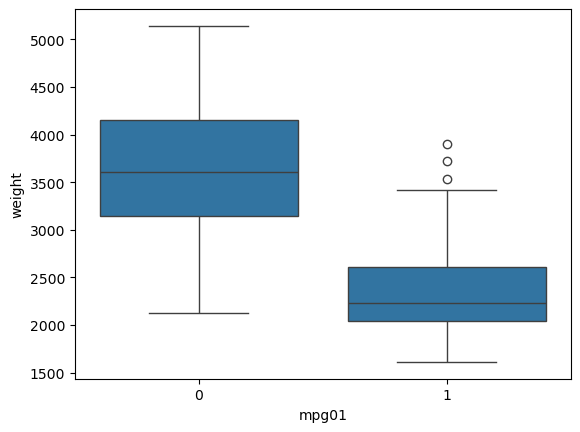

In [159]:
sns.boxplot(data=auto, x='mpg01', y='weight')

<Axes: xlabel='mpg01', ylabel='horsepower'>

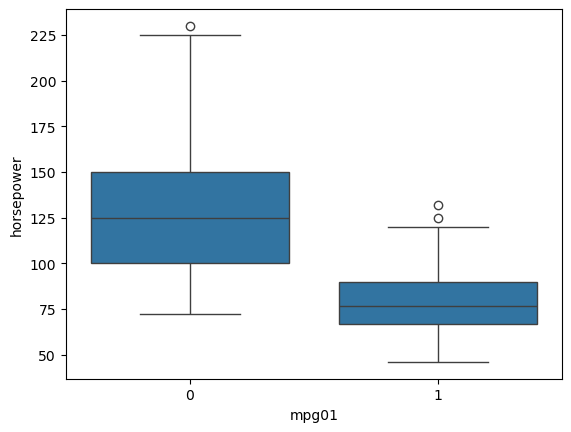

In [155]:
sns.boxplot(data=auto, x='mpg01', y='horsepower')

<Axes: xlabel='mpg01', ylabel='cylinders'>

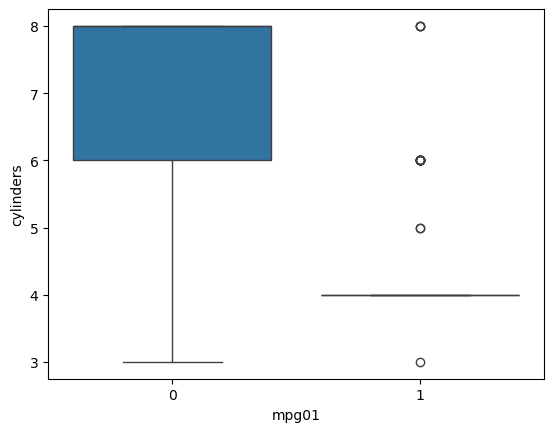

In [161]:
sns.boxplot(data=auto, x='mpg01', y='cylinders')

<Axes: xlabel='mpg01', ylabel='year'>

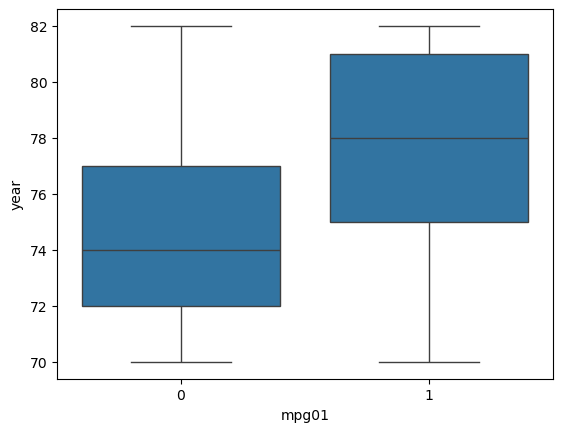

In [163]:
sns.boxplot(data=auto, x='mpg01', y='year')

**My Answer:**

Looking at the boxplots and scatterplots, there appears to be a clear relationship between the new categorical response variable, mpg01, and several other variables. As cylinders, horsepower, and weight increase, more observations tend to fall into the 0 category, which corresponds to lower mileage. In contrast, higher acceleration and more recent model years are associated with the 1 category, indicating higher mileage.

## **14(c)**

Split the data into a training set and a test set.

In [314]:
train_data = auto.iloc[int(0.7 * len(auto)):]
test_data = auto.iloc[:int(0.7 * len(auto))]

## **14(d - h)**

Perform LDA, QDA, logistic regression, naive bayes, and KNN on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [ ]:

X_train = train_data[['cylinders','horsepower','weight','acceleration','year']] 
y_train = train_data['mpg01'] 
X_test = test_data[['cylinders','horsepower','weight','acceleration','year']] 
y_test = test_data['mpg01'] 

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_prob = lda_model.predict_proba(X_test)[:, 1]  
y_pred_class = lda_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_class)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Down', 'Actual Up'], 
                     columns=['Predicted Down', 'Predicted Up'])
print("Confusion Matrix (Test Data):")
print(cm_df)
print("Linear Discriminant Analysis (LDA)")
y_pred_lda = lda_model.predict(X_test)
print_results("LDA", y_test, y_pred_lda)
y_train_pred = lda_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy: {train_accuracy:.4f}")
test_accuracy = accuracy_score(y_test, y_pred_lda)
print(f"Test accuracy: {test_accuracy:.4f}")
test_error = 1 - test_accuracy
print(f"Test error: {test_error:.4f}")

In [220]:
print("Quadratic Discriminant Analysis (QDA)")
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred_qda = qda_model.predict(X_test)
print_results("QDA", y_test, y_pred_qda)

y_train_pred = qda_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_qda)
print(f"Test accuracy: {test_accuracy:.4f}")

test_error = 1 - test_accuracy
print(f"Test error: {test_error:.4f}")

Quadratic Discriminant Analysis (QDA)

QDA Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down              60             7
Actual Up                16           113

Overall fraction of correct predictions: 0.8827
Accuracy percentage: 88.27%

Training accuracy: 0.9133
Test accuracy: 0.8827
Test error: 0.1173


In [222]:
print("Logistic Regression")
logit_model = LogisticRegression(max_iter=200)
logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)
print_results("Logistic", y_test, y_pred_logit)

y_train_pred = logit_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_logit)
print(f"Test accuracy: {test_accuracy:.4f}")

test_error = 1 - test_accuracy
print(f"Test error: {test_error:.4f}")

Logistic Regression

Logistic Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down              57            10
Actual Up                 8           121

Overall fraction of correct predictions: 0.9082
Accuracy percentage: 90.82%

Training accuracy: 0.9133
Test accuracy: 0.9082
Test error: 0.0918


In [228]:
print("Naive Bayes")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print_results("Logistic", y_test, y_pred_nb)

y_train_pred = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Test accuracy: {test_accuracy:.4f}")

test_error = 1 - test_accuracy
print(f"Test error: {test_error:.4f}")

Naive Bayes

Logistic Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down              61             6
Actual Up                13           116

Overall fraction of correct predictions: 0.9031
Accuracy percentage: 90.31%

Training accuracy: 0.9133
Test accuracy: 0.9031
Test error: 0.0969


In [236]:
print("KNN K=5")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_kn = knn_model.predict(X_test)
print_results("Logistic", y_test, y_pred_kn)

y_train_pred = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_kn)
print(f"Test accuracy: {test_accuracy:.4f}")

test_error = 1 - test_accuracy
print(f"Test error: {test_error:.4f}")

KNN K=5

Logistic Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down              65             2
Actual Up                33            96

Overall fraction of correct predictions: 0.8214
Accuracy percentage: 82.14%

Training accuracy: 0.9184
Test accuracy: 0.8214
Test error: 0.1786


## **16**

Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, naive Bayes, and KNN models using
various subsets of the predictors. Describe your findings.


Hint: You will have to create the response variable yourself, using the
variables that are contained in the Boston data set.

In [240]:
Boston = load_data('Boston')

In [242]:
Boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [244]:
Boston.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

In [246]:
Boston.median()

crim         0.25651
zn           0.00000
indus        9.69000
chas         0.00000
nox          0.53800
rm           6.20850
age         77.50000
dis          3.20745
rad          5.00000
tax        330.00000
ptratio     19.05000
lstat       11.36000
medv        21.20000
dtype: float64

In [248]:
#Response variable 

crime_median = Boston['crim'].median()
crime01 = np.where(Boston['crim'] > crime_median, 1, 0)

print(f"\nBinary variable crime01 created:")
print(f"Shape: {crime01.shape}")
print(f"Data type: {crime01.dtype}")
print(f"Value counts:\n{pd.Series(crime01).value_counts().sort_index()}")


Binary variable crime01 created:
Shape: (506,)
Data type: int64
Value counts:
0    253
1    253
Name: count, dtype: int64


In [253]:
#Adding new variable to dataset
Boston['crime01'] = crime01

Boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  crime01  
0   4.98  24.0        0  
1   9.14  21.6        0  
2   4.03  34.7        0  
3   2.94  33.4        0  
4   5.33  36.2        0

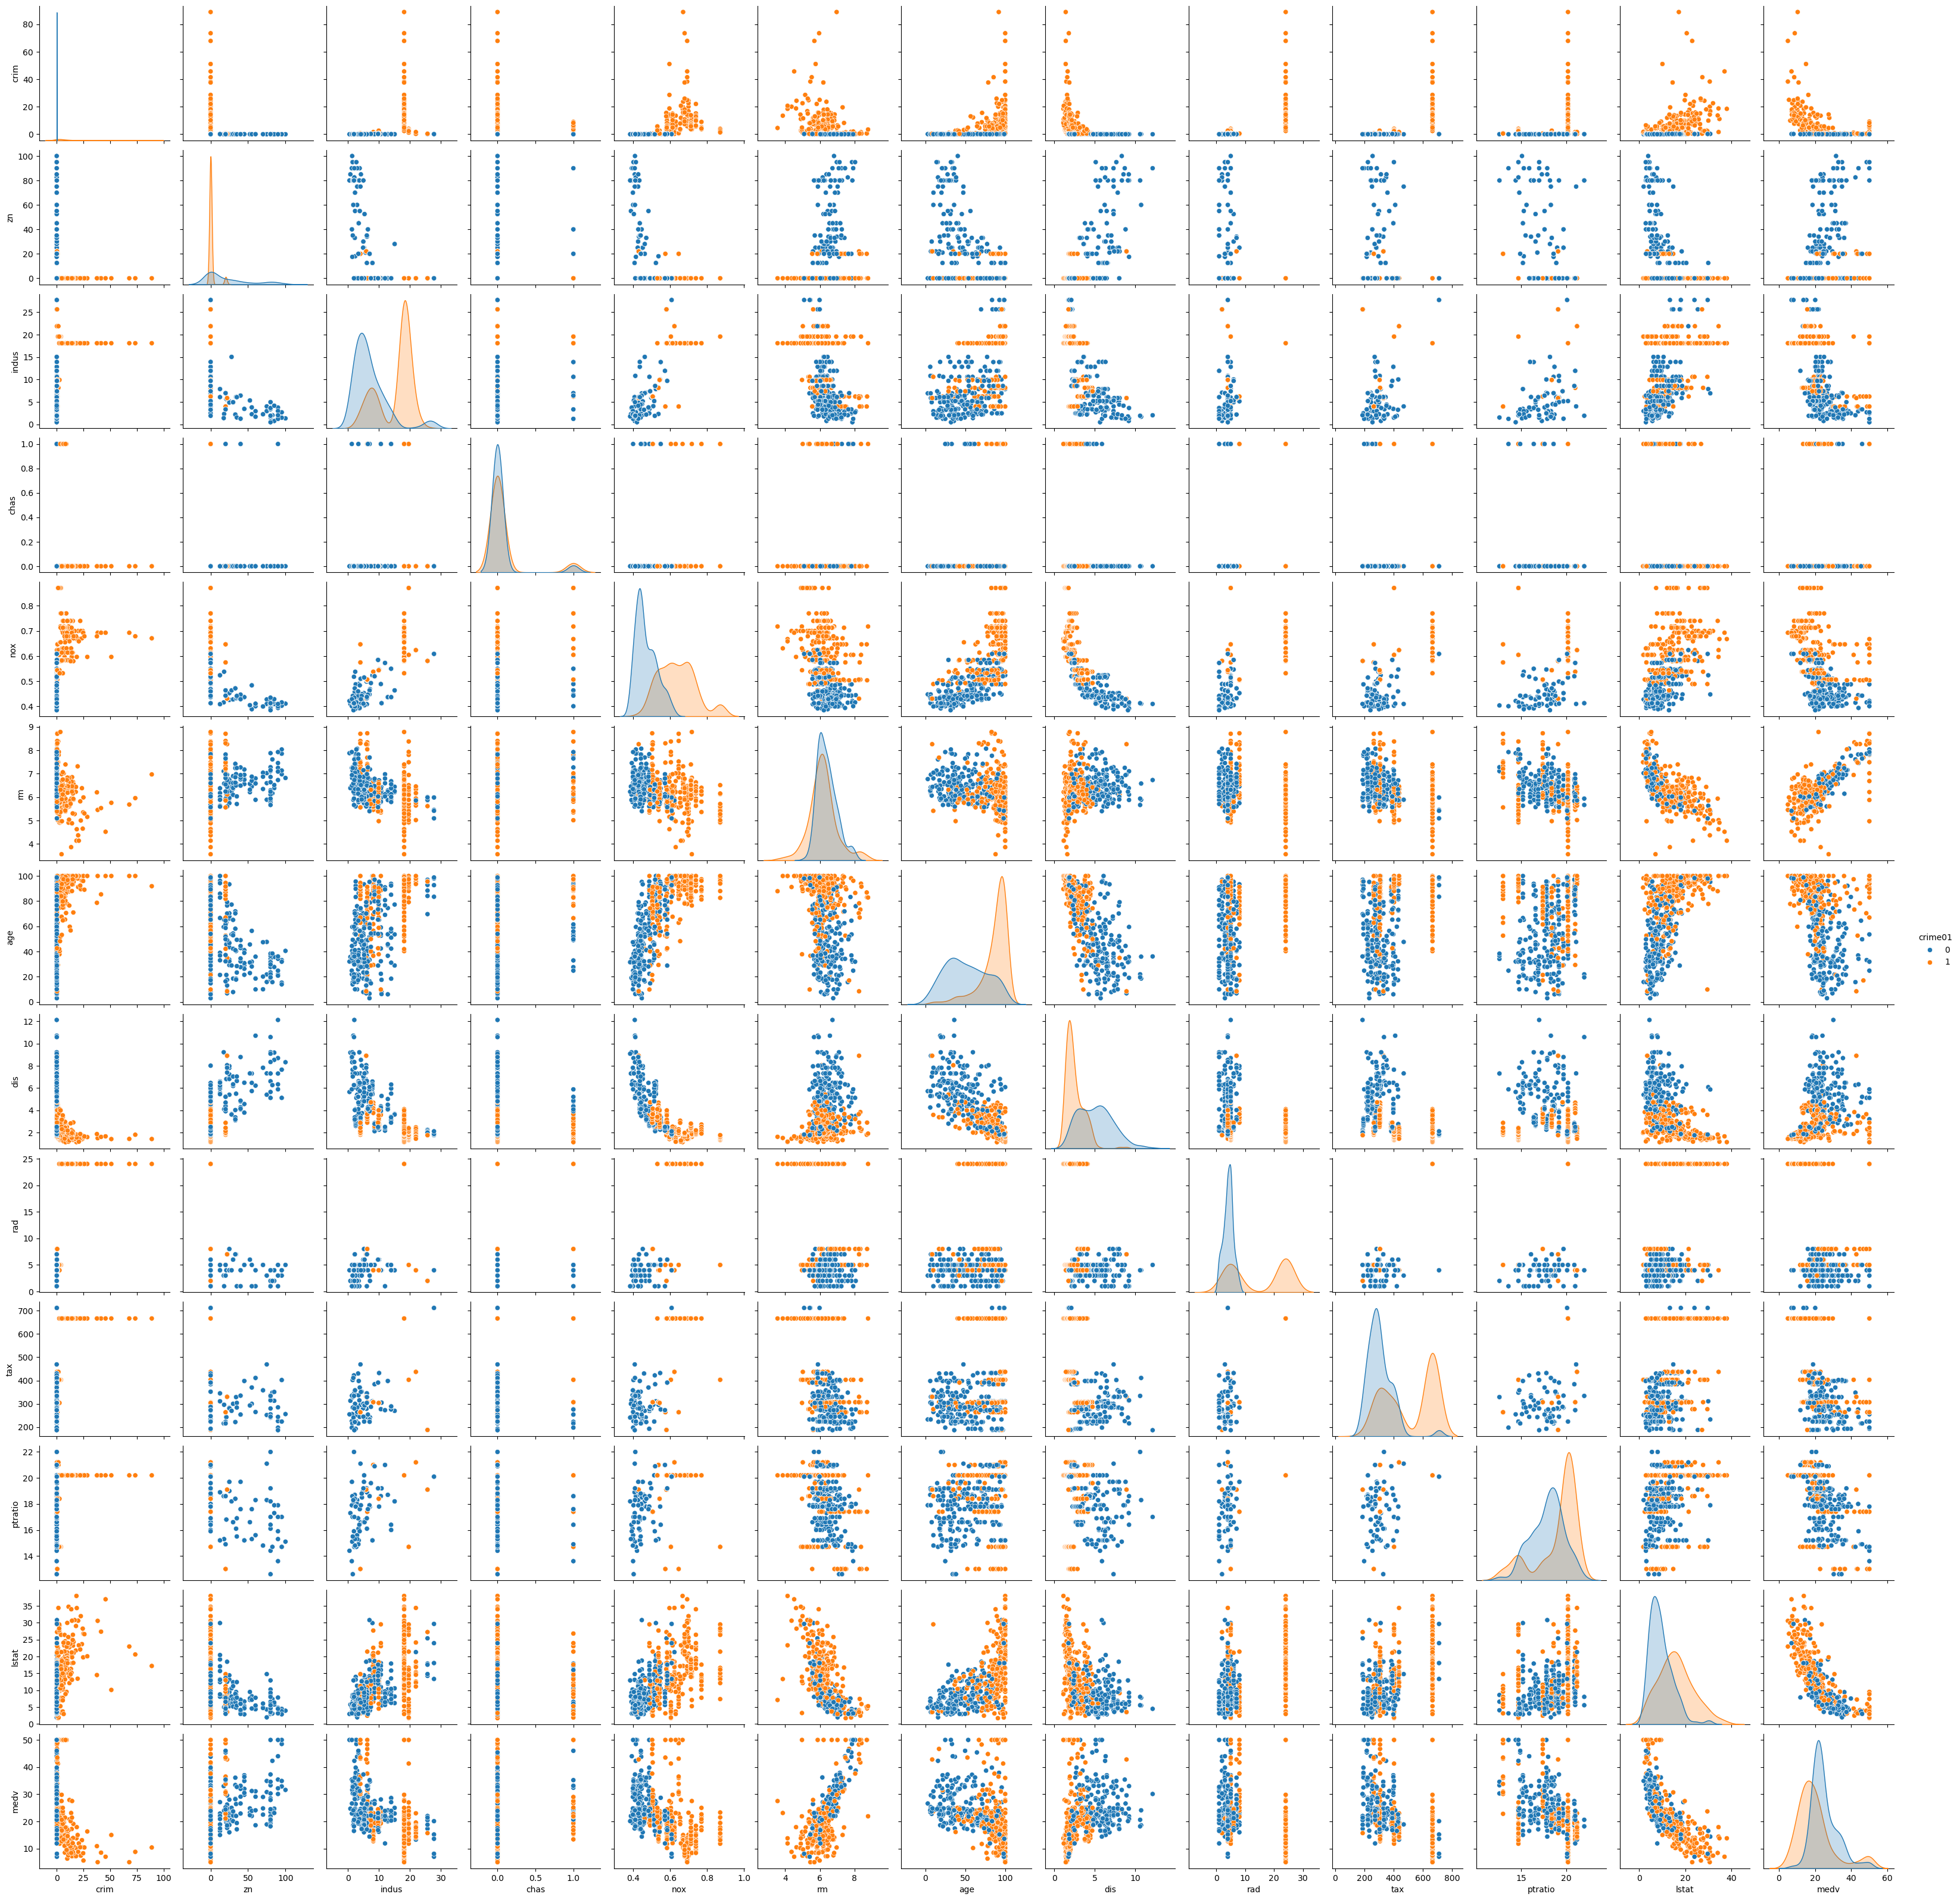

In [269]:
sns.pairplot(Boston, hue = 'crime01')

<Axes: xlabel='crime01', ylabel='age'>

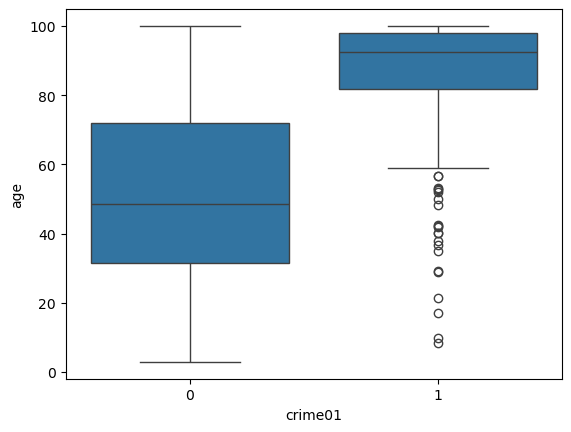

In [257]:
sns.boxplot(data=Boston, x='crime01', y='age')

<Axes: xlabel='crime01', ylabel='rm'>

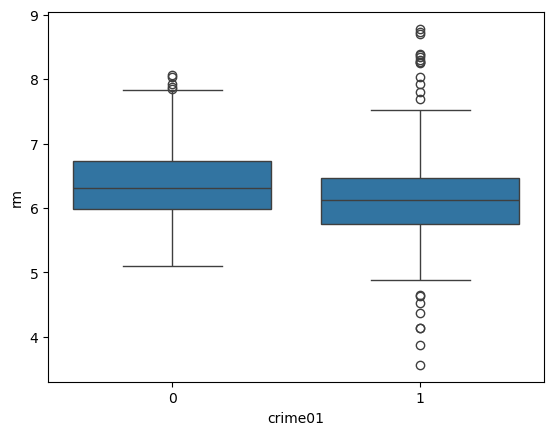

In [259]:
sns.boxplot(data=Boston, x='crime01', y='rm')

<Axes: xlabel='crime01', ylabel='dis'>

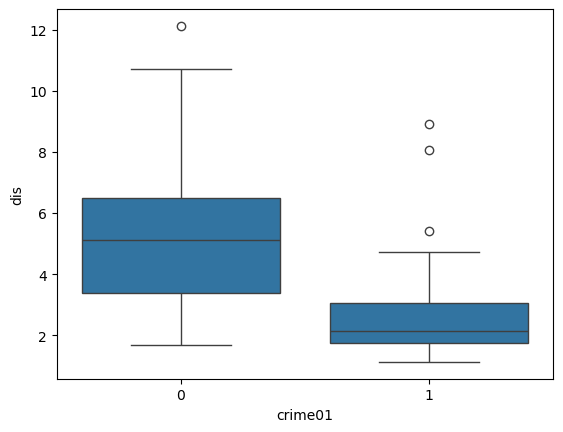

In [261]:
sns.boxplot(data=Boston, x='crime01', y='dis')

<Axes: xlabel='crime01', ylabel='ptratio'>

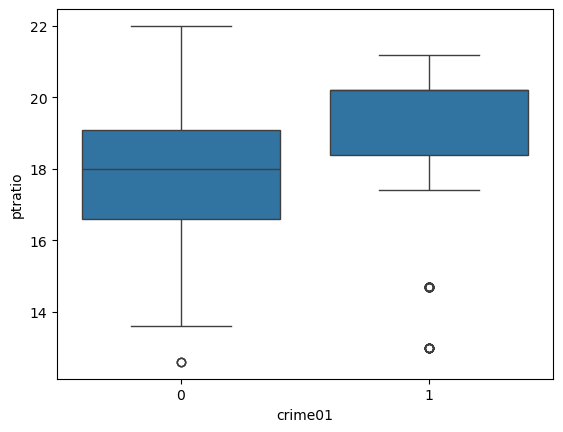

In [263]:
sns.boxplot(data=Boston, x='crime01', y='ptratio')

<Axes: xlabel='crim', ylabel='lstat'>

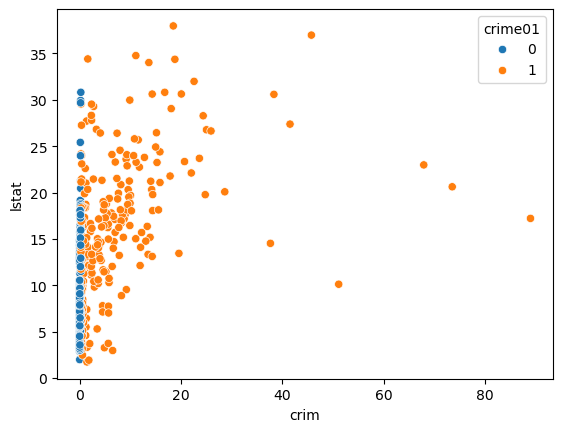

In [265]:
sns.scatterplot(data = Boston, x = 'crim', y = 'lstat', hue = 'crime01')

<Axes: xlabel='crime01', ylabel='lstat'>

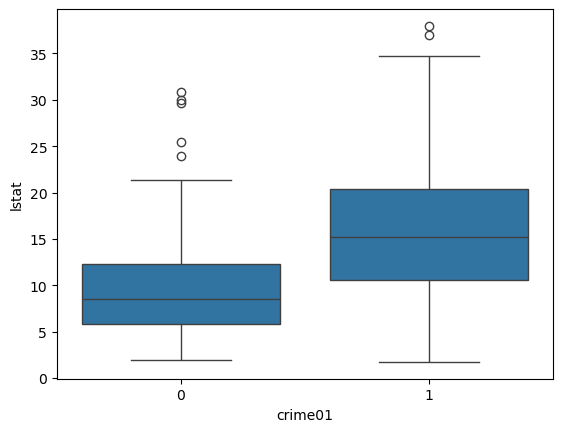

In [267]:
sns.boxplot(data=Boston, x='crime01', y='lstat')

Looking at the scatterplots and boxplots above, I believe the variables that will be good predictors of living in a high crime area (crime01 = 1) are lstat (lower socioeconomic status), ptratio (pupil-teacher ratio), dis (distance to five Boston employment centres), age (age of homestead), rm (average number of rooms in dwellings), nox, and chas (variable dummy, 1 = tracts bound river, 0 = otherwise).

In [284]:
train_data = Boston.iloc[253:]
test_data = Boston.iloc[:253]

X_train = train_data[['lstat','ptratio','dis','age','rm','nox','chas']] 
y_train = train_data['crime01'] 

X_test = test_data[['lstat','ptratio','dis','age','rm','nox','chas']] 
y_test = test_data['crime01'] 

logit_model = LogisticRegression(max_iter=200)
logit_model.fit(X_train, y_train)

y_pred_prob = logit_model.predict_proba(X_test)[:, 1]  
y_pred_class = logit_model.predict(X_test)

print("Logistic Regression")
y_pred_logit = logit_model.predict(X_test)
print_results("Logistic Regression", y_test, y_pred_logit)

y_train_pred = logit_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_logit)
print(f"Test accuracy: {test_accuracy:.4f}")

test_error = 1 - test_accuracy
print(f"Test error: {test_error:.4f}")

Logistic Regression

Logistic Regression Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down             104            59
Actual Up                10            80

Overall fraction of correct predictions: 0.7273
Accuracy percentage: 72.73%

Training accuracy: 0.8814
Test accuracy: 0.7273
Test error: 0.2727


In [286]:
print("Linear Discriminate Analysis (LDA)")
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)
print_results("LDA", y_test, y_pred_logit)

y_train_pred = lda_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_lda)
print(f"Test accuracy: {test_accuracy:.4f}")

test_error = 1 - test_accuracy
print(f"Test error: {test_error:.4f}")

Linear Discriminate Analysis (LDA)

LDA Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down             104            59
Actual Up                10            80

Overall fraction of correct predictions: 0.7273
Accuracy percentage: 72.73%

Training accuracy: 0.8933
Test accuracy: 0.7866
Test error: 0.2134


In [288]:
print("Quadratic Discriminant Analysis (QDA)")
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred_qda = qda_model.predict(X_test)
print_results("QDA", y_test, y_pred_qda)

y_train_pred = qda_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_qda)
print(f"Test accuracy: {test_accuracy:.4f}")

test_error = 1 - test_accuracy
print(f"Test error: {test_error:.4f}")

Quadratic Discriminant Analysis (QDA)

QDA Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down             121            42
Actual Up                33            57

Overall fraction of correct predictions: 0.7036
Accuracy percentage: 70.36%

Training accuracy: 0.8893
Test accuracy: 0.7036
Test error: 0.2964


In [290]:
print("Naive Bayes")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print_results("Logistic", y_test, y_pred_nb)

y_train_pred = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Test accuracy: {test_accuracy:.4f}")

test_error = 1 - test_accuracy
print(f"Test error: {test_error:.4f}")

Naive Bayes

Logistic Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down             128            35
Actual Up                21            69

Overall fraction of correct predictions: 0.7787
Accuracy percentage: 77.87%

Training accuracy: 0.8735
Test accuracy: 0.7787
Test error: 0.2213


In [296]:
print("KNN K=10")
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred_kn = knn_model.predict(X_test)
print_results("Logistic", y_test, y_pred_kn)

y_train_pred = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_pred_kn)
print(f"Test accuracy: {test_accuracy:.4f}")

test_error = 1 - test_accuracy
print(f"Test error: {test_error:.4f}")

KNN K=10

Logistic Results:
Confusion Matrix (Test Data 2009-2010):
             Predicted Down  Predicted Up
Actual Down             103            60
Actual Up                11            79

Overall fraction of correct predictions: 0.7194
Accuracy percentage: 71.94%

Training accuracy: 0.8617
Test accuracy: 0.7194
Test error: 0.2806
